In [2]:
import os

import marvin
from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import math
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
from astropy.wcs import WCS

from astropy.io import fits

/home/mjlang/miniconda3/lib/python3.8/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR15


In [1]:
with fits.open('./data/galaxies_sorted.fits') as hdulist:
    plateifu_list = hdulist[1].data['plateifu']
    ra = hdulist[1].data['RA']
    dec = hdulist[1].data['Dec']
    

mapnames = 'maps.emline_gflux_ha_6564'
errormap = ''

lofar_file_path = './data/lofar_imgs/'
lofar_list = os.listdir(lofar_file_path)

NameError: name 'fits' is not defined

### Sample Image

In [4]:
#sample = 5

def mk(sample):
    figp = plt.figure(figsize=(12,6))

    with fits.open(lofar_file_path+lofar_list[sample]) as hdulofar:
        lofarim = hdulofar[0].data
        lofarwcs = WCS(hdulofar[0].header)

    #size = np.shape(lofarim)[0]*1.5
    size = 150
    im = Image(plateifu=plateifu_list[sample])
    #im.get_new_cutout(size,size)

    axp_im = figp.add_subplot(1, 3, 1, projection = im.wcs)
    axp_im.imshow(im.data)

    im.overlay_hexagon(axp_im, color='cyan', linewidth=0.75, transform=axp_im.get_transform(im.wcs))

    m,md,sd = sigma_clipped_stats(lofarim)

    axp_im.contour(lofarim, transform=axp_im.get_transform(lofarwcs), levels = [m+3*sd,m+4*sd,m+8*sd,m+16*sd,m+32*sd], colors='grey')


    maps = Maps(plateifu=plateifu_list[sample])
    axp_map = figp.add_subplot(132)
    mapplot.plot(dapmap=maps[mapnames], fig=figp, ax=axp_map, title=''.join((plateifu_list[sample],'Hα minSNR=3')),snr_min=3)

[WARNING]: Specified hdu=MANGA not found, reading in first available table (hdu=1) instead. This will result in an error in future versions! (AstropyDeprecationWarning)


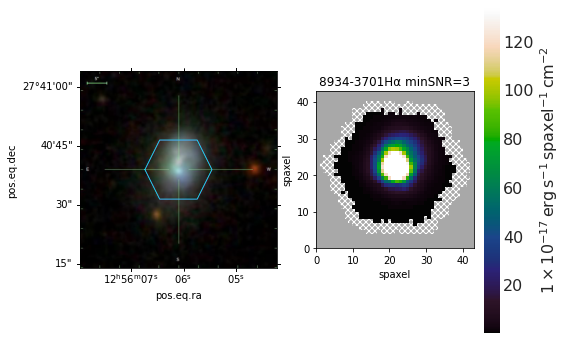

In [5]:
mk(1)

### All Image

KeyboardInterrupt: 

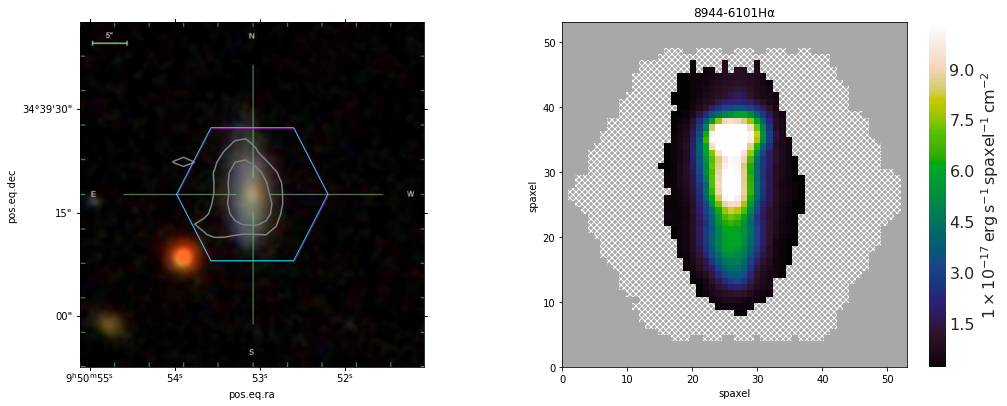

In [37]:
rows = 12
cols = 2
fig = plt.figure(figsize=(cols*2*9, rows*7.5))
#fig, axs = plt.subplots(rows, 2*cols, figsize=(cols*2*5, rows*5))
for m in range(0,rows):
    for n in range(0,cols):
        
        with fits.open(lofar_file_path+lofar_list[cols*m+n]) as hdulofar:
            lofarim = hdulofar[0].data
            lofarwcs = WCS(hdulofar[0].header)
        size = np.shape(lofarim)[0]*1.5
        im = Image(plateifu=plateifu_list[cols*m+n])
        
        im.get_new_cutout(size,size, scale=0.5)
        ax_im = fig.add_subplot(rows, 2*cols, (cols*m+n)*2+1, projection = im.wcs)
        ax_im.imshow(im.data)
        im.overlay_hexagon(ax_im, color='cyan', linewidth=0.75, transform=ax_im.get_transform(im.wcs))
        
        mean,md,sd = sigma_clipped_stats(lofarim)
        ax_im.contour(lofarim, transform=ax_im.get_transform(lofarwcs), levels = [mean+3*sd,mean+5*sd,mean+8*sd,mean+16*sd,mean+32*sd], colors='grey')
        
        
        maps = Maps(plateifu=plateifu_list[cols*m+n])
        ax_map = fig.add_subplot(rows, 2*cols, (cols*m+n+1)*2)
        mapplot.plot(dapmap=maps[mapnames], fig=fig, ax=ax_map, title=''.join((plateifu_list[cols*m+n],'Hα')))

print(im.data)
print(type(im.data))

In [ ]:
maps[mapnames]

<Marvin Maps (plateifu='8462-3703', mode='remote', data_origin='api', bintype='HYB10', template='GAU-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line summed flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

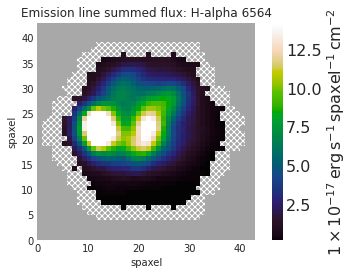

In [3]:
from marvin.tools.maps import Maps
maps = Maps(plateifu='8462-3703')
print(maps)
# get an emission line map
haflux = maps.emline_sflux_ha_6564
values = haflux.value
ivar = haflux.ivar
mask = haflux.mask
haflux.plot()

In [ ]:
figp = plt.figure(figsize=(12,6))

with fits.open(lofar_file_path+lofar_list[sample]) as hdulofar:
    lofarim = hdulofar[0].data
    lofarwcs = WCS(hdulofar[0].header)

#size = np.shape(lofarim)[0]*1.5
size = 150
im = Image(plateifu=plateifu_list[sample])
#im.get_new_cutout(size,size)

axp_im = figp.add_subplot(1, 3, 1, projection = im.wcs)
axp_im.imshow(im.data)

im.overlay_hexagon(axp_im, color='cyan', linewidth=0.75, transform=axp_im.get_transform(im.wcs))

m,md,sd = sigma_clipped_stats(lofarim)

axp_im.contour(lofarim, transform=axp_im.get_transform(lofarwcs), levels = [m+3*sd,m+4*sd,m+8*sd,m+16*sd,m+32*sd], colors='grey')


maps = Maps(plateifu=plateifu_list[sample])
axp_map = figp.add_subplot(132)
mapplot.plot(dapmap=maps[mapnames], fig=figp, ax=axp_map, title=''.join((plateifu_list[sample],'Hα minSNR=3')),snr_min=3)